In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/usr/local/lib/python3.8/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

In [3]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz

In [4]:
neurd.set_volume_params(
    volume = "microns"
)

# Data Prep: Loading mesh

In [5]:
from mesh_tools import trimesh_utils as tu

In [6]:
segment_id = 864691135510518224

In [7]:
mesh_filepath = f"./{segment_id}.off"
mesh_filepath = '864691135510518224_small_double_soma.off'
mesh = tu.load_mesh_no_processing(mesh_filepath)
mesh

<trimesh.Trimesh(vertices.shape=(154713, 3), faces.shape=(323535, 3))>

# Step 1: Decimation

In [8]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Morphology/m65_morphology_2_Decimation_v1.ipynb

In [9]:
decimation_kwargs = dict(
    decimation_ratio =0.25,
)

In [10]:
mesh_dec = tu.decimate(
    mesh,
    **decimation_kwargs
)

xvfb-run -n 1312 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_93267.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_93267_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/decimation_meshlab_25494468.mls


In [11]:
print(f"mesh = {mesh}")
print(f"mesh_dec = {mesh_dec}")

mesh = <trimesh.Trimesh(vertices.shape=(154713, 3), faces.shape=(323535, 3))>
mesh_dec = <trimesh.Trimesh(vertices.shape=(33683, 3), faces.shape=(80883, 3))>


In [12]:
ipvu.plot_objects(
    meshes = [mesh,mesh_dec],
    meshes_colors=["green","red"],
)

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Step 2: Some Identification

In [13]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Morphology/m65_morphology_3_MeshFragment_full_v1.ipynb

In [14]:
from neurd import soma_extraction_utils as sm
sm.output_global_parameters_nuclei()

module: neurd.soma_extraction_utils data_type set to microns, algorithms = ['nuclei']
curr_dict = {'nucleus_min': 700 (None), 'nucleus_max': None (int unsigned), }
Unknown dict_name = global_parameters_dict_microns_nuclei


{'nucleus_min': 700 (None), 'nucleus_max': None (int unsigned), }

In [15]:
mesh_dec = mesh

In [16]:
(total_soma_list, 
 run_time, 
 total_soma_list_sdf,
 glia_pieces,
 nuclei_pieces) = sm.extract_soma_center(
    segment_id,
    mesh = mesh_dec,
    return_glia_nuclei_pieces=True,
    verbose = True,
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 1025 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_99603.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_99603_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_313801.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_99603.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_99603_remove_interior.off
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_313801.mls is being deleted....
There were 16 tot

  0%|          | 0/9 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.769893]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 4823 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_272750.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_272750_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_524067.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_272750.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_272750_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_524067.mls is being deleted....
Inside sphere validater: ratio_val = 2.7266923461590085
----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.781901, 0.3351845]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 5419 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_494490.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_494490_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_144846.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_494490.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_494490_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_144846.mls is being deleted....
Inside sphere validater: ratio_val = 2.130721459144365
Using Poisson Surface Reconstruction for watertightness in soma

xvfb-run -n 7017 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_27489.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_27489_fill_holes.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_909122.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Opening a file with extention off
FilterScript
Reading filter with name Remove Duplicate Vertices
Reading filter with name Remove Faces fro

removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_628945.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_628945_poisson.off
mesh.is_watertight = False
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_830926.mls is being deleted....
Inside sphere validater: ratio_val = 2.779561458917224
About to add the following inside nuclei pieces after soma backtrack: [<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <tri

  0%|          | 0/9 [00:00<?, ?it/s]

Largest hole before segmentation = 84198.44608552229, after = 79686.03659527568,

ratio = 0.9464074493053798, difference = -4512.409490246602
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 6507 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_52297.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_52297_fill_holes.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_192281.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_52297.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_52297_fill_holes.off
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_192281.mls is being deleted....
xvfb-run -n 2487 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applicat

  0%|          | 0/2 [00:00<?, ?it/s]

No split meshes were above the width threshold (0.32) and size threshold (2000) so continuing
So just going with old somas
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>
 <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
Not need to do a second pass because already found a soma


In [80]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_extraction_meshes(
    mesh_dec,
    total_soma_list,
    glia_pieces,
    nuclei_pieces,
    verbose = True,
)

# of somas = 2
# of glia = 0
# of nuclei = 18


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Step 3: Decomposition

In [18]:
from neurd import neuron

In [19]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Auto_Proof/m65_autoproof_4_Decomposition_full_v1.ipynb

In [20]:
neurd.set_volume_params(
    volume = "microns"
)

In [21]:
somas = [
 total_soma_list, 
 run_time, 
 total_soma_list_sdf,
]

picking a random 7 digit segment id: 84530917
--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>, <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>, <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
soma_mesh_list_centers = [array([1488880.76058317,  589300.09373793, 1100652.31345512]), array([1472182.71408549,  577993.08644009, 1112354.27575333])]
Getting Glia and Nuclei Pieces Subtracted Away 0.15792489051818848
 Splitting mesh after soma cancellation 1.6807746887207031
# of split_meshes = 4
 Containing Mesh Indices 0.019295930862426758
containing_mesh_indices = {0: 0, 1: 0}
 non_soma_touching_meshes 1.

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/33579 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.3711698055267334
connecting at the root
branches_touching_root = [6]
combining close nodes
combine_threshold = 700
length of Graph = 3258
After combining close endpoints max(kept_branches_idx) = 6, len(kept_branches_idx) = 7
empty_indices % = 0.0
 conflict_indices % = 0.002908632942517017


  0%|          | 0/3 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/7 [00:00<?, ?it/s]

Decomposing first pass: 2.3072495460510254
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [638, 7672]
mesh_large_connectivity: 0.002768993377685547
Finding MAP candidates connected components: 6.651878356933594e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.07028818130493164
Grouping MP Sublimbs by Graph: 0.03550601005554199
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0016930103302001953
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7078 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/po

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.017275333404541016
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.56391978263855
Checking connected components after removing cycles
Total time for mesh KDTree = 0.040300607681274414
sbv[0].reshape(-1,3) = [[1487208.   596715.8 1099876. ]]
closest_sk_pt_coord BEFORE = [1487610.  597313. 1100720.]
current_skeleton.shape = (301, 2, 3)
node_for_stitch = 213: [1487610.  597313. 1100720.]
node_for_stitch AFTER = 213: [1487610.  597313. 1100720.]
possible_node_loc = [  0  43 213 301]
possible_node_loc AFTER = [  0  43 213 301]
curr_shortest_path = [213]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1487610.  597313. 1100720.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1487610.,  597313., 1100

  0%|          | 0/1 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (281, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 9.908994436264038
Working on limb correspondence for #0 MAP piece
xvfb-run -n 1482 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_51788.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_51788_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_907953.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_51788.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron

0it [00:00, ?it/s]

Total time for decomposition = 1.6726500988006592
mesh_correspondence_first_pass: 1.672685146331787
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (281, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (281, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.15908543922984356
 conflict_indices % = 0.026233453670276775


  0%|          | 0/15 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 12.004319906234741
correspondence_1_to_1: 0.42095470428466797
Total time for MAP sublimb processing 12.004385709762573
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.02260589599609375
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.020953893661499023
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.023895978927612305
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1491450.08344721  608267.60149996 1098228.13300974]
MP_branches_with_stitch_point = [0, 1]
MAP_branc

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1710517639301022
 conflict_indices % = 0.010847345862182658


  0%|          | 0/97 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1476472.93997195  615033.74821465 1108138.04148317]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.19947333772218565
 conflict_indices % = 0.003785385121790652


  0%|          | 0/8 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.1892735291670134
 conflict_indices % = 0.04672547224764916


  0%|          | 0/58 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/4 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1488771.89112037  605282.82224157 1100475.99894991]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1745835903763109
 conflict_indices % = 0.006785934608266502


  0%|          | 0/8 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.23459590232101005
 conflict_indices % = 0.014213351478037348


  0%|          | 0/30 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 25.468019485473633
Number of matching vertices = 26
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1487610.  597313. 1100720.]]
Number of end_nodes BEFORE filtering = 7
all_single_nodes_to_eliminate = [4]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/10 [00:00<?, ?it/s]

66697 66698
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/10 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1484150.   588282.7 1095391. ]
Time for preparing soma vertices and root: 0.0003082752227783203
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20269 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.41it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.5226819515228271
branches_touching_root = [3]
combining close nodes
combine_threshold = 700
length of Graph = 5975
After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 25
empty_indices % = 0.0
 conflict_indices % = 0.010165121237665492


  0%|          | 0/11 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/25 [00:00<?, ?it/s]

Decomposing first pass: 2.9069063663482666
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.3855438232421875e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.04775834083557129
sbv[0].reshape(-1,3) = [[1484150.   588282.7 1095391. ]]
closest_sk_pt_coord BEFORE = [1483982.08022895  588135.81137922 1094821.63000965]
current_skeleton.shape = (556, 2, 3)
node_for_stitch = 556: [1483982.08022895  588135.81137922 1094821.63000965]
node_for_stitch AFTER = 556: [1483982.08022895  588135.81137922 1094821.63000965]
possible_node_loc = [  2 556]
possible_node_loc AFTER = [  2 556]
curr_shortest_path = [556]
Current stitch point was a branch or endpoint

  0%|          | 0/25 [00:00<?, ?it/s]

40338 40339
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/25 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1476534.   581771.6 1109552. ]
Time for preparing soma vertices and root: 0.00018644332885742188
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20030 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  9.64it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.3340275287628174
branches_touching_root = [1]
combining close nodes
combine_threshold = 700
length of Graph = 2074
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.002637462007987742


  0%|          | 0/1 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Decomposing first pass: 1.519033670425415
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2091]
mesh_large_connectivity: 0.00011348724365234375
Finding MAP candidates connected components: 5.817413330078125e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.052213430404663086
Grouping MP Sublimbs by Graph: 0.022099018096923828
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.015107154846191406
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 382 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/poisson_1

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.012776851654052734
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.496639251708984
Checking connected components after removing cycles
Total time for mesh KDTree = 0.029949665069580078
sbv[0].reshape(-1,3) = [[1476534.   581771.6 1109552. ]]
closest_sk_pt_coord BEFORE = [1476740.  582484. 1109380.]
current_skeleton.shape = (73, 2, 3)
node_for_stitch = 0: [1476740.  582484. 1109380.]
node_for_stitch AFTER = 0: [1476740.  582484. 1109380.]
possible_node_loc = [ 0 73]
possible_node_loc AFTER = [ 0 73]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1476740.  582484. 1109380.]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[1476740.,  582484., 1109380.]])}
    Total time fo

0it [00:00, ?it/s]

Total time for decomposition = 0.9083280563354492
mesh_correspondence_first_pass: 0.9083561897277832
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (73, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (73, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.1449067431850789
 conflict_indices % = 0.0


  0%|          | 0/4 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 8.764946460723877
correspondence_1_to_1: 0.1632695198059082
Total time for MAP sublimb processing 8.765012502670288
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.016282081604003906
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1481900.72163354  586937.6302398  1100472.34094648]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.21514154379442868
 conflict_indices % = 0.00957021928612695


  0%|          | 0/134 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 17.540291786193848
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1476740.  582484. 1109380.]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

39810 39811
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1474851.   571357.5 1113536. ]
Time for preparing soma vertices and root: 0.00017499923706054688
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11304 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 13.67it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.26866602897644043
connecting at the root
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 1216
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0026850443032310034


  0%|          | 0/1 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Decomposing first pass: 0.656414270401001
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.504753112792969e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.4543533325195312e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.1296379566192627
sbv[0].reshape(-1,3) = [[1474851.   571357.5 1113536. ]]
closest_sk_pt_coord BEFORE = [1478327.0746533   571496.39513115 1112568.79431172]
current_skeleton.shape = (816, 2, 3)
node_for_stitch = 79: [1478327.0746533   571496.39513115 1112568.79431172]
node_for_stitch AFTER = 79: [1478327.0746533   571496.39513115 1112568.79431172]
possible_node_loc = [  0 816]
possible_node_loc AFTER = [  0 816]
curr_shortest_path = [79, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0,

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.20502645502645503
 conflict_indices % = 0.0


  0%|          | 0/50 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

curr_width_median = 87.50057414093507
curr_width_median = 443.7480051377248
curr_width_median = 382.02971359465397
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 2.7209458351135254
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 3.687899351119995
Number of matching vertices = 18
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1475123.88888889  571587.50555556 1113243.55555556]]
Number of end_nodes BEFORE filtering = 4
all_single_nodes_to_eliminate = [1]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

22345 22346
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/5 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1493560.   586779.1 1105606. ]
Time for preparing soma vertices and root: 0.0002465248107910156
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10788 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 15.74it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.19266414642333984
connecting at the root
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 741
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.9537620544433594
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [20742]
mesh_large_connectivity: 0.0001304149627685547
Finding MAP candidates connected components: 5.841255187988281e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.006440162658691406
Grouping MP Sublimbs by Graph: 2.2172927856445312e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.038725852966308594
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4339 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/pois

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.0279848575592041
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 21.630176067352295
Checking connected components after removing cycles
Total time for mesh KDTree = 0.08229756355285645
sbv[0].reshape(-1,3) = [[1493560.   586779.1 1105606. ]]
closest_sk_pt_coord BEFORE = [1492710.  587118. 1106620.]
current_skeleton.shape = (744, 2, 3)
node_for_stitch = 199: [1492710.  587118. 1106620.]
node_for_stitch AFTER = 199: [1492710.  587118. 1106620.]
possible_node_loc = [  0  53 130 147 177 199 317 405 563 577 581 609 702 712 744]
possible_node_loc AFTER = [  0  53 130 147 177 199 317 405 563 577 581 609 702 712 744]
curr_shortest_path = [199]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1492710.  587118. 1106620.]
skipping soma 0 because closest skelet

  0%|          | 0/10 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (688, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 22.905157804489136
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8113 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_54385.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_54385_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_616115.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_54385.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuro

0it [00:00, ?it/s]

Total time for decomposition = 3.102719783782959
mesh_correspondence_first_pass: 3.102748394012451
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (688, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (688, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.17303056600134992
 conflict_indices % = 0.05279143766271333


  0%|          | 0/54 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/7 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 27.71890425682068
correspondence_1_to_1: 1.6722288131713867
Total time for MAP sublimb processing 27.718966722488403
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 28.888379335403442
Number of matching vertices = 60
Number of matching vertices = 13
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1474820.  582855. 1113480.]
 [1492710.  587118. 1106620.]]
Number of end_nodes BEFORE filtering = 5
all_single_nodes_to_eliminate = [0, 2]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/7 [00:00<?, ?it/s]

20741 20742
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/7 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1486653.   594244.2 1104480. ]
Time for preparing soma vertices and root: 0.0002815723419189453
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9843 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 16.24it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.24699115753173828
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 818
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.971750020980835
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.5762786865234375e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.430511474609375e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.13896775245666504
sbv[0].reshape(-1,3) = [[1486653.   594244.2 1104480. ]]
closest_sk_pt_coord BEFORE = [1486547.7606223   594609.92820407 1104601.87572914]
current_skeleton.shape = (817, 2, 3)
node_for_stitch = 817: [1486547.7606223   594609.92820407 1104601.87572914]
node_for_stitch AFTER = 817: [1486547.7606223   594609.92820407 1104601.87572914]
possible_node_loc = [334 817]
possible_node_loc AFTER = [334 817]
curr_shortest_path = [817]
Current stitch point was a branch or endpoi

  0%|          | 0/1 [00:00<?, ?it/s]

19361 19362
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1491272.  582425. 1102199.]
Time for preparing soma vertices and root: 0.00018405914306640625
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7350 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 20.28it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.18384957313537598
connecting at the root
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 734
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.44608187675476074
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.2928924560546875e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.002716064453125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.13060498237609863
sbv[0].reshape(-1,3) = [[1491272.  582425. 1102199.]]
closest_sk_pt_coord BEFORE = [1491378.93502276  582020.70946596 1101822.28585048]
current_skeleton.shape = (733, 2, 3)
node_for_stitch = 1: [1491378.93502276  582020.70946596 1101822.28585048]
node_for_stitch AFTER = 1: [1491378.93502276  582020.70946596 1101822.28585048]
possible_node_loc = [  0 708]
possible_node_loc AFTER = [  0 708]
curr_shortest_path = [1, 0.0]
Current stitch point was not a branch or endpo

  0%|          | 0/1 [00:00<?, ?it/s]

14575 14576
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 7 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1468936.   574693.8 1112623. ]
Time for preparing soma vertices and root: 0.000240325927734375
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2055 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 61.97it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.10159587860107422
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 117
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.1288313865661621
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [3349]
mesh_large_connectivity: 0.000186920166015625
Finding MAP candidates connected components: 7.700920104980469e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0028944015502929688
Grouping MP Sublimbs by Graph: 2.9325485229492188e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.012485980987548828
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 3509 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/poisso

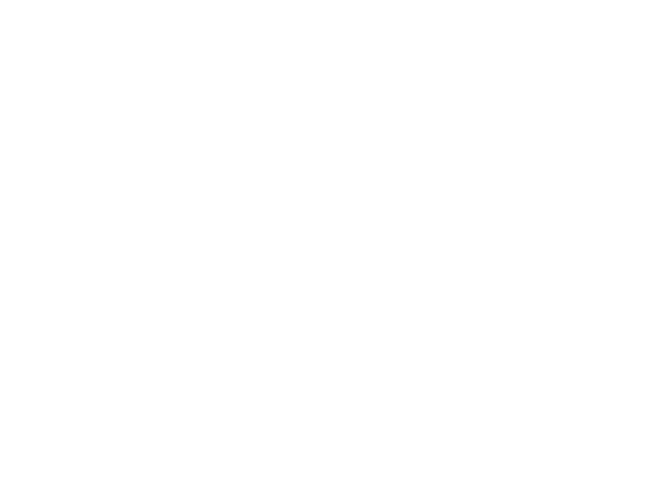

0it [00:00, ?it/s]

len(leftover_meshes_sig) = [<trimesh.Trimesh(vertices.shape=(2056, 3), faces.shape=(3349, 3))>]


  0%|          | 0/1 [00:00<?, ?it/s]

invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2055 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 39.08it/s]

Time for sk_meshparty_obj = 0.07761478424072266
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 117
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [6278.58946421]
width_median= 6278.589464208121
Time for correspondence = 0.1424720287322998
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.024829864501953125
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.70747184753418
Checking connected components after removing cycles
Total time for mesh KDTree = 0.030472755432128906
sbv[0].reshape(-1,3) = [[1468936.   574693.8 1112623. ]]
closest_sk_pt_coord BEFORE = [1467110.60911576  578567.92374513 1112556.22084362]
current_skeleton.shape = (118, 2, 3)
node_for_stitch = 3: [1467110.60911576  578567.92374513 1112556.22084362]
node_for_stitch AFTER = 3: [1467110.60911576  578567.92374513 1112556.22084362]
possible_node_loc = [  0 106 117]
possible_node_loc AFTER = [  0 106 117]
curr_shortest_path = [3, 1.0, 2.0, 4.0, 6.0, 8.0, 0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1640.5629151199066
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1467110.6091

  0%|          | 0/1 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (117, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 10.914019584655762
Working on limb correspondence for #0 MAP piece
xvfb-run -n 1592 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_98678.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_98678_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_802819.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_98678.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuro

0it [00:00, ?it/s]

Total time for decomposition = 1.0839567184448242
mesh_correspondence_first_pass: 1.0839898586273193
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (117, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (117, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.3353239773066587
 conflict_indices % = 0.03254702896386981


  0%|          | 0/4 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 12.348888397216797
correspondence_1_to_1: 0.33840155601501465
Total time for MAP sublimb processing 12.348977327346802
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 12.58853530883789
Number of matching vertices = 90
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1468163.64444444  578622.88333333 1112816.05555556]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

3348 3349
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 105.40147495269775


 ----- Working on Stitching ----------
Inside attach_floating_pieces_to_limb_correspondence
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(113, 3), faces.shape=(176, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 78.02it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.031061649322509766
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [400.6602908]
width_median= 400.6602908022751
segment_widths_median = [400.6602908]
Decomposing first pass: 0.04219388961791992
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.4332275390625e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.2649765014648438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07491660118103027
Using Distance measure skeletal_distance


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13351774215698242
Floating 1: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(140, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.152557373046875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 59.45it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.033657073974609375
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 24
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [159.99342859]
width_median= 159.99342858588034
segment_widths_median = [159.99342859]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 78.40it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08169770240783691
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 34
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [160.01074253]
width_median= 160.0107425276666
segment_widths_median = [160.01074253]
Using the axon parameters
Decomposing first pass: 0.04365706443786621
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.125999450683594e-05
Total time for MAP sublimb processing 5.245208740234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.8623809814453125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.16222548484802246
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

139 140
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2580130100250244
winning_float = 1
winning_float_match_main_limb = 1
winning_float_dist = 149.5869181909169
main_limb_stitch_point = [1454928.38848372  617422.14351492 1109437.08084759]
floating_limb_stitch_point = [1455057.   617365.2 1109488. ]
node_for_stitch = 1795: [1454928.38848372  617422.14351492 1109437.08084759]
node_for_stitch AFTER = 1795: [1454928.38848372  617422.14351492 1109437.08084759]
possible_node_loc = [   0  136  440  586 1094 1284 1353 1466 2499 3964 4341 4358 5744 5814
 5965  577  688 1089 1114 1389 1640 1693 2508 2844 4194 5319]
possible_node_loc AFTER = [   0  136  440  577  586  688 1089 1094 1114 1284 1353 1389 1466 1640
 1693 2499 2508 2844 3964 4194 4358 5319 5744 5814 5965]
curr_shortest_path = [1795, 1784.0, 1773.0, 1761.0, 1750.0, 1733.0, 1716.0, 1702.0, 1687.0, 1678.0, 1671.0, 1664.0, 1656.0, 1649.0, 1641.0, 1636.0, 1632.0, 1627.0, 1623.0, 1596.0, 1576.0, 1566.0, 1556.0, 1548.0, 1540.0, 1530.0, 1523.0, 1515.0, 1507.0, 1499.0, 1491.0, 1484.

    current_width= 111.9796517426644
Working on limb L1 branch 3
    current_width= 95.32640663158229
Working on limb L1 branch 7
    current_width= 102.37981426575901
Working on limb L1 branch 8
    current_width= 131.75016231242103
Working on limb L1 branch 5
    current_width= 129.34942722079472
Working on limb L1 branch 6
    current_width= 108.30020672887802
Working on limb L1 branch 0
    current_width= 97.68811695225403
Working on limb L1 branch 2
    current_width= 124.3431697776255
Working on limb L1 branch 23
    current_width= 87.93425564048837
Working on limb L1 branch 24
    current_width= 82.4982383186942
Working on limb L4 branch 2
    current_width= 983.515729285562
Working on limb L4 branch 0
    current_width= 425.35433115782877
Working on limb L4 branch 3
    current_width= 652.8862588219039
Working on limb L4 branch 1
    current_width= 291.42416343917137
Working on limb L4 branch 4
    current_width= 504.27782367039697
Working on limb L4 branch 5
    current_width=

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 96



  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 98



  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 82



  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 188



  0%|          | 0/188 [00:00<?, ?it/s]

  0%|          | 0/188 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 33



  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 149



  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 161



  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 107



  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/107 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 51



  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 30



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 80



  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 134



  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 120



  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 6
    No spines and using precomputed width: 596.1283984971308
Working on limb L0 branch 3
    current_width= 415.1235219676192
Working on limb L0 branch 7
    No spines and using precomputed width: 387.52515672413
Working on limb L0 branch 0
    current_width= 261.67118520971894
Working on limb L0 branch 1
    current_width= 277.7069504096059
Working on limb L0 branch 2
    current_width= 290.8767242170229
Working on limb L0 branch 4
    current_width= 300.9105148683843
Working on limb L0 branch 8
    No spines and using precomputed width: 307.0250455225934
Working on limb L0 branch 5
    current_width= 232.65418959299325
Working on limb L0 branch 9
    current_width= 278.12839711062554
Working on limb L1 branch 17
    current_wi

In [22]:
neuron_obj = neuron.Neuron(
    mesh = mesh,
    somas = somas,
    suppress_preprocessing_print=False,
    suppress_output=False,
    glia_meshes=glia_pieces,
    nuclei_meshes = nuclei_pieces,
)

In [23]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

## calculating statistics about neuron

In [24]:
from neurd.microns_volume_utils import data_interface as hdju
voxel_adjustment_vector = hdju.voxel_to_nm_scaling

stats_dict = neuron_obj.neuron_stats(stats_to_ignore = [
                    "n_boutons",
                     "axon_length",
                     "axon_area",
                     "max_soma_volume",
                     "max_soma_n_faces",],
    include_skeletal_stats = True,
    include_centroids= True,
    voxel_adjustment_vector=voxel_adjustment_vector,
)

stats_dict

Total Number of Branches = 55
n_short_branches = 12, n_medium_branches = 40, n_long_branches = 3
axon_length = 1605.6197682948082, axon_branch_length_median = 16.735647518195066, axon_branch_length_mean = 29.19308669626924
bbox_volume = 1.9827346050336923
bbox_corners = [[1430458.66683036  502584.20727049 1020174.81709652]
 [1564397.98216806  659939.53090215 1114250.        ]]
bbox_corners_soma_relative = [[-58422.09375281 -86715.88646744 -80477.4963586 ]
 [ 75517.22158489  70639.43716422  13597.68654488]]


{'n_vertices': 154713,
 'n_faces': 323535,
 'max_soma_area': 341.07163148783616,
 'n_not_processed_soma_containing_meshes': 0,
 'n_error_limbs': 1,
 'n_same_soma_multi_touching_limbs': 0,
 'n_multi_soma_touching_limbs': 1,
 'n_somas': 2,
 'n_limbs': 8,
 'n_branches': 57,
 'max_limb_n_branches': 27,
 'skeletal_length': 1543739.2939173584,
 'max_limb_skeletal_length': 604558.5039643556,
 'median_branch_length': 14983.573,
 'width_median': 186.744,
 'width_no_spine_median': 186.744,
 'width_90_perc': 483.118,
 'width_no_spine_90_perc': 483.118,
 'n_spines': 401,
 'spine_density': 0.0002597588864778012,
 'spines_per_branch': 7.035087719298246,
 'skeletal_length_eligible': 1022369.119,
 'n_spine_eligible_branches': 34,
 'spine_density_eligible': 0.000392226244462691,
 'spines_per_branch_eligible': 11.794,
 'total_spine_volume': 36734517460.200005,
 'spine_volume_median': 64105155.88328934,
 'spine_volume_density': 23795.803867234157,
 'spine_volume_density_eligible': 35930.77761985885,
 'sp

## skeleton and skeleton stats

In [25]:
skeleton = neuron_obj.skeleton

ipvu.plot_objects(
    main_skeleton=skeleton
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [26]:
from neurd import neuron_statistics as nst

sk_stats = nst.skeleton_stats_from_neuron_obj(
    neuron_obj,
    include_centroids=True,
    voxel_adjustment_vector=voxel_adjustment_vector,
    verbose = True
)

sk_stats

Total Number of Branches = 55
n_short_branches = 12, n_medium_branches = 40, n_long_branches = 3
axon_length = 1605.6197682948082, axon_branch_length_median = 16.735647518195066, axon_branch_length_mean = 29.19308669626924
bbox_volume = 1.9827346050336923
bbox_corners = [[1430458.66683036  502584.20727049 1020174.81709652]
 [1564397.98216806  659939.53090215 1114250.        ]]
bbox_corners_soma_relative = [[-58422.09375281 -86715.88646744 -80477.4963586 ]
 [ 75517.22158489  70639.43716422  13597.68654488]]


{'skeletal_length': 1543739.2939173584,
 'n_branches': 57,
 'branch_length_median': 16.735647518195066,
 'branch_length_mean': 29.19308669626924,
 'n_short_branches': 12,
 'n_long_branches': 3,
 'n_medium_branches': 40,
 'bbox_volume': 1.9827346050336923,
 'bbox_x_min': 1430458.6668303611,
 'bbox_y_min': 502584.2072704911,
 'bbox_z_min': 1020174.8170965186,
 'bbox_x_max': 1564397.9821680577,
 'bbox_y_max': 659939.5309021459,
 'bbox_z_max': 1114250.0,
 'bbox_x_min_soma_relative': -58422.0937528112,
 'bbox_y_min_soma_relative': -86715.88646743615,
 'bbox_z_min_soma_relative': -80477.49635860184,
 'bbox_x_max_soma_relative': 75517.22158488538,
 'bbox_y_max_soma_relative': 70639.43716421863,
 'bbox_z_max_soma_relative': 13597.686544879572,
 'n_limbs': 8,
 'centroid_x_nm': 1488880.7605831723,
 'centroid_y_nm': 589300.0937379273,
 'centroid_z_nm': 1100652.3134551204,
 'centroid_x': 372220,
 'centroid_y': 147325,
 'centroid_z': 27516,
 'centroid_volume': 440.7405976697012}

# Step 3.5

In [27]:
from neurd import neuron_utils as nru

filepath = nru.save_compressed_neuron(
    neuron_obj,
    output_folder = "./",
    file_name = f"large_double_soma",
    return_file_path = True,
)

Total time for soma meshes compression = 0.1902453899383545
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.3275332450866699
Total time for limb_meshes compression = 0.4978296756744385
    Starting Limb Correspondence Compression


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 2.854642391204834
Total time for compression = 4.341434001922607


---Finished outputing neuron at location: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/large_double_soma---


# Step 4: Split Multi-Soma Merges

In [28]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Auto_Proof/m65_autoproof_5_DecompositionSplitMultiSoma_full_v1.ipynb

In [29]:
from neurd import proofreading_utils as pru

neurd.set_volume_params(
    "microns"
)

In [30]:
plot_intermediates = True
plot_suggestions = True
plot_cut_coordinates = True
only_multi_soma_paths = False
verbose = True

multi_soma_limbs = [4]
multi_touch_limbs = []


 -------- Working on limb 4------------
Starting combinations to process = [[2 0]]


---- working on disconnecting 2 and 0
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [2, 0]
remove_segment_threshold = 1500
high_degree_endpoint_coordinates_tried = []
consider_path_neighbors_for_removal is set so segments_to_consider = [3]
Trying combining short segments with a larger threshold 2500
Short segments to combine = [3]


-------- Removing Segments -------------
curr_short_seg_revised = 3
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[1493540.  587165. 1108840.]
 [1495040.  586425. 1109970.]]
new_stitch_point = [1494290.  586795. 1109405.]
Angles for [2 0 1 4] are [36.31, 92.11, 88.72, 46.34]
Branch that will absorb mesh of 3 is 2 
Revised cut path = [2 0]

  0%|          | 0/1 [00:00<?, ?it/s]

  Edge: [2 0]: curr_angle = 78.12
Total time for doubling_back = 0.032733917236328125
high_degree_endpoint_coordinates_widths = [551.1430118882398]
high_degree_order = [0]
Picking [1494290.  586795. 1109405.] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
Inisde resolving_crossovers: debug_dict=/n{'apply_width_filter': True, 'best_match_width_diff_max': 75, 'best_match_width_diff_max_perc': 0.6, 'best_match_width_diff_min': 0.25, 'best_singular_match': True, 'lowest_angle_sum_for_pairs': False}
coordinate = [1494290.  586795. 1109405.]
coordinate_branches = [0, 1, 2, 4]
0 = red
1 = aqua
2 = purple
4 = green


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

edges_to_avoid= None
Angle between 0 and 1 = 159.25 
Angle between 0 and 2 = 60.99 
width_diff = 558.1613981277333, width_diff_perc = 0.5675164936438675

Angle between 0 and 4 = 60.83 
width_diff = 78.9234925125682, width_diff_perc = 0.15650795812935392

Angle between 1 and 2 = 59.43 
width_diff = 692.0915658463906, width_diff_perc = 0.7036914054736416

Not adding edge [1, 2] because width_diff= 692.0915658463906, width_diff_perc= = 0.7036914054736416
Angle between 1 and 4 = 57.75 
width_diff = 212.8536602312256, width_diff_perc = 0.4220960158072502

Angle between 2 and 4 = 62.82 
width_diff = 479.237905615165, width_diff_perc = 0.48727019949471423

Final Matches = [[0, 2], [0, 4], [1, 4], [2, 4]]
matched_branches_revised = [[1, 4], [0, 2]]
Aligned Skeleton Parts


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Original graph


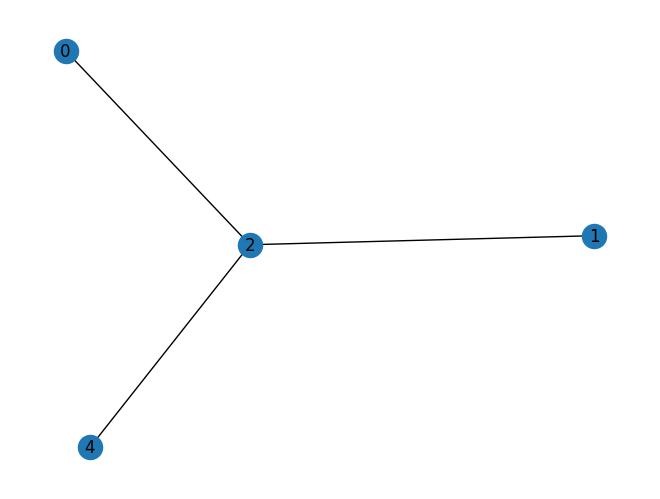

match_branches = [[1, 4], [0, 2]]
branches_to_avoid= []
1: No Pair so adding back old edge
1: Old neighbors = [2]
4: No Pair so adding back old edge
4: Old neighbors = [2]
new_neighbors = [[1, 2], [2, 4]]
edges_to_delete (resolve crossover) = [[0, 1], [0, 4]]
edges_to_create (resolve crossover) = [[1, 4], [0, 2], [1, 2], [2, 4]]
nx.number_connected_components(G) before = 1
G.edges() = [(2, 0)]
G.nodes() = [2, 0]
nx.number_connected_components(G) after = 1
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  0%|          | 0/1 [00:00<?, ?it/s]

  Edge: [2 0]: curr_angle = 78.12
Total time for doubling_back = 0.03253459930419922

Attempting the width jump check (ARTIFICIALLY ATTEMPTING FROM BOTH SIDES)
width_jump_threshold = 200
  Edge: [2 0]: jump = -527.25
Total time for width = 0.020521163940429688
Did not find an error edge in either of the paths
Number of connected components = 2
Comp 0 = {0, 1, 2, 4, 5, 6}
Comp 1 = {3}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
--> So Setting the default_cut_edge to last
edges_to_delete (cut_limb_network) = [[2, 0]]
edges_to_create = []
edge_diff = [[2 0]]
total_soma_paths_to_cut = []


suggested_cut_points = [[1494290.  586795. 1109405.]]




Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


**** Computing red blue splits****
Conn comp size before expansion = [5, 1]
Not expanding to removed branches

--Doing Red/Blue splits for S0_0
error_branches=[1 2 4 5 6]
valid_upstream_branches_restriction = [0]
Error Branches = [1 2 4 5 6]

**conn_comp_errors = [[2], [1], [4, 5, 6]]
Grouping all conn comp together

**conn_comp_errors AFTER PAIRING = [[2, 1, 4, 5, 6]]
Working on connected component: [2, 1, 4, 5, 6]
Branch 2 had a valid upstream node 0 with common endpoint [[1494290.  586795. 1109405.]]
Branch 1 had a valid upstream node 0 with common endpoint [[1494290.  586795. 1109405.]]
Branch 4 had a valid upstream node 0 with common endpoint [[1494290.  586795. 1109405.]]
Skipping upstream node 4 because was not in valid_upstream_branches_res

point_array= [[1493404.15624227  587118.92226152 1108075.23525543]
 [1492710.          587118.         1106620.        ]]
Deciding between min_cancel_distance = 1612.3161563042866, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1612.3161563042866
blue 2 node offset skeleton coordinate is [1493404.15624227  587118.92226152 1108075.23525543]
 --> using closest_mesh_face method curr_points = [[1493554.33333333  586398.03333333 1108003.66666667]]
blue 2 node offset skeleton coordinate is [1492710.  587118. 1106620.]
 --> using closest_mesh_face method curr_points = [[1492624.  587993. 1106840.]]
point_array= [[1493398.32007519  587221.92248762 1109548.5022058 ]
 [1492596.8663701   587627.01174959 1109880.73500657]
 [1492048.92592633  587957.71450222 1110631.79220621]]
Deciding between min_cancel_distance = 957.4988174791176, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1000.0
red 0 node offset skeleton coordinate is [1493398.32007519  5

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [31]:
(split_results,
red_blue_split_results) = pru.multi_soma_split_suggestions(
    neuron_obj,
    plot_intermediates=plot_intermediates,
    plot_suggestions=plot_suggestions,
    plot_cut_coordinates = plot_cut_coordinates,
    only_multi_soma_paths=only_multi_soma_paths,
    default_cut_edge = "last",
    verbose = verbose,
    output_red_blue_suggestions = True,
    split_red_blue_by_common_upstream = True,
    apply_valid_upstream_branches_restriction = True,
    debug_red_blue = False,
)

In [32]:
from neurd import soma_splitting_utils as ssu
ssu.plot_red_blue_split_suggestions_per_limb(
    neuron_obj,
    red_blue_split_results,
    
)



-------- Suggestions for Limb 4------


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Step 5: Splitting Multi-Neuron

In [33]:
import numpy as np
from neurd import soma_splitting_utils as ssu
from neurd import proofreading_utils as pru

neurd.set_volume_params(
    "microns"
)

In [34]:
n_paths_cut = pru.get_n_paths_cut(
    split_results,
    verbose = True)

n_paths_multi_soma = 1
n_paths_multi_touch = 0
n_paths_cut = 1


In [35]:
verbose = True

(neuron_list,
neuron_list_errored_limbs_area,
neuron_list_errored_limbs_skeletal_length,
neuron_list_n_multi_soma_errors,
neuron_list_n_same_soma_errors) = pru.split_neuron(neuron_obj,
    limb_results=split_results,
    verbose=verbose,
    return_error_info=True,
)

multiplicity = len(neuron_list)

using precomputed split suggestions


---Working on Splitting Limb 4 with 3 components----


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1492710.  587118. 1106620.]---------
Starting_edge inside branches_to_conept = [[1492710.  587118. 1106620.]
 [1494290.  586795. 1109405.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [1]
printing out current edge:
[[1492710.  587118. 1106620.]
 [1494290.  586795. 1109405.]]
edge_endpoints_to_process was empty so exiting loop after 5 iterations
starting_node in concept map (that should match the starting edge) = 1
Total time for branches to concept conversion = 0.02914714813232422

Done generating concept network 




----Working on seperate_graph 1----


---------Working on soma_idx = 1, soma_group_idx 0, endpt = [1474820.  582855. 1113480.]---------
Starting_edge inside branches_to_conept = [[1474820.  582855. 1113480.]
 [1494290.  586795. 110

# Cell Typing

In [36]:
"""
Functions to be implemented in volume_utils

nuclei_from_segment_id
-> returns nucleus_ids,nucleus_centers

"""

'\nFunctions to be implemented in volume_utils\n\nnuclei_from_segment_id\n-> returns nucleus_ids,nucleus_centers\n\n'

In [37]:
verbose = True

hdju = pru.data_mod
hdju

In [38]:
split_index = 0
neuron_obj_pre_filt = neuron_list[split_index]

In [39]:
# 1) Retrieving the corresponding nucleus ids
nucleus_ids,nucleus_centers = hdju.nuclei_from_segment_id(
    segment_id,
    return_centers=True,
    return_nm=True
    )

if verbose:
    if nucleus_ids is not None:
        print(f"Number of Corresponding Nuclei = {len(nucleus_ids)}")
        print(f"nucleus_ids = {nucleus_ids}")
        print(f"nucleus_centers = {nucleus_centers}")
        


In [40]:
plot_initial_neuron = True

if plot_initial_neuron:
    neuron_obj_rot = hdju.align_neuron_obj(neuron_obj_pre_filt)
    nviz.visualize_neuron(neuron_obj_rot,limb_branch_dict = "all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [41]:
nviz.visualize_neuron(neuron_obj_pre_filt,limb_branch_dict = "all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [42]:
#2) Refining the width array to match sksleton coordinates if it doesn't

from neurd import branch_utils as bu

bu.refine_width_array_to_match_skeletal_coordinates(
        neuron_obj_pre_filt,
        verbose = False
)

In [43]:
from neurd import neuron_simplification as nsimp

plot_floating_end_nodes_limb_branch_dict =  False
plot_downstream_path_limb_branch = False
plot_after_simplification = True

# 3) Performs branch simplification so there should always be 2 or more child branches
neuron_obj_pre_filt_after_simp = nsimp.branching_simplification(
    neuron_obj_pre_filt,
    return_copy = True,

    #floating endpiece arguments
    plot_floating_end_nodes_limb_branch_dict = plot_floating_end_nodes_limb_branch_dict,
    plot_final_neuron_floating_endpoints = False,

    # combine path arguments
    plot_downstream_path_limb_branch = plot_downstream_path_limb_branch,
    plot_final_neuron_path = False,
    plot_after_simplification = True,
    verbose = verbose,
)



N_branches on limbs before simplification
L0: 10
L1: 27
L2: 5
L3: 1
L4: 1
--- STARTING merge_floating_end_nodes_to_parent----



---N_branches on limbs AFTER merge_floating_end_nodes_to_parent---
L0: 10 (difference of 0)
L1: 27 (difference of 0)
L2: 5 (difference of 0)
L3: 1 (difference of 0)
L4: 1 (difference of 0)



--- STARTING COMBINING BRANCHES----
jitter_segment = None
b_d.endpoints = [[1465201.13645255  644973.35231468 1076973.46519181]
 [1465639.47749826  643515.05932515 1076757.45951826]]
jitter_segment = None
b_d.endpoints = [[1453249.48354083  616028.64738608 1111904.55308479]
 [1457432.          617891.2        1107602.        ]]

---Working on limb L1, deleting [26, 25]
new_node_name_dict = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: -1, 26: -2}
Finished relabeling nodes
AFter relabeling branch names: [-2 -1  0  1  2  3  4  5  6  7  

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [44]:
# Filter away a large cluster of dendrite if requested SKIPPED

filter_low_branch_cluster_dendrite = False
plot_limb_branch_filter_away_low_branch = False

if filter_low_branch_cluster_dendrite:
    neuron_obj_pre_class, filtering_info_low_branch = pru.apply_proofreading_filters_to_neuron(
        input_neuron = neuron_obj_pre_filt_after_simp,
        filter_list = [pru.low_branch_length_clusters_dendrite_filter],
        plot_limb_branch_filter_with_disconnect_effect=False,
        plot_limb_branch_filter_away=plot_limb_branch_filter_away_low_branch,
        plot_final_neuron=False,

        return_error_info=True,
        verbose=False,
        verbose_outline=verbose)
else:
    neuron_obj_pre_class = neuron_obj_pre_filt_after_simp
    filtering_info_low_branch = {}

In [45]:
from neurd import neuron_utils as nru

winning_nucleus_id, nucleus_info = nru.pair_neuron_obj_to_nuclei(
    neuron_obj_pre_class,
    "S0",
    nucleus_ids,
    nucleus_centers,
    nuclei_distance_threshold = 15000,
    return_matching_info = True,
    verbose=True)

if verbose:
    print(f"nucleus_info = {nucleus_info}")
    print(f"winning_nucleus_id = {winning_nucleus_id}")


nucleus_info = {'nucleus_id': None, 'nuclei_distance': None, 'n_nuclei_in_radius': None, 'n_nuclei_in_bbox': None}
winning_nucleus_id = None


In [46]:
# Getting the cell types from the database

database_cell_type_info = hdju.nuclei_classification_info_from_nucleus_id(
    winning_nucleus_id
)

database_e_i_class = database_cell_type_info[f"external_cell_type"]  

if verbose:
    print(f"database_cell_type_info = {database_cell_type_info}")
    print(f"database_e_i_class = {database_e_i_class}")

database_cell_type_info = {'external_cell_type': None, 'external_cell_type_n_nuc': None, 'external_cell_type_fine': None, 'external_cell_type_fine_n_nuc': None, 'external_cell_type_fine_e_i': None}
database_e_i_class = None


In [47]:
# Adding the synapses to the cell
plot_synapses = True


neurd.set_volume_params(
    "microns"
)

from neurd import synapse_utils as syu
from neurd.microns_volume_utils import data_interface as hdju
hdju.set_synapse_filepath(synapse_filepath = '/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135510518224_synapses.csv')

neuron_obj_attr = syu.add_synapses_to_neuron_obj(
    neuron_obj_pre_class,
    segment_id = segment_id,
    #synapse_filepath = '/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135510518224_synapses.csv',
    validation = False,
    verbose  = verbose,
    original_mesh = mesh_dec,
    plot_valid_error_synapses = False,
    calculate_synapse_soma_distance = False,
    add_valid_synapses = True,
    add_error_synapses=False,
)

if plot_synapses:
    syu.plot_synapses(neuron_obj_attr)


---Step 1: Computing synapse_dict---
# of presyn: 62
# of postsyn: 903

---Step 2: Computing mesh_label_dict---
-- Working on presyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 3
# of valid_syn_idx = 59
-- Working on postsyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 345
# of valid_syn_idx = 558

---Step 3: add_valid_synapses_to_neuron_obj---
Synapse dict: 0.0014
Original Mesh: 0.1697
Closest Branch: 0.1152
Closest Skeleton Branch and distance from endpoint: 0.6819
Closest Branch: 0.0539
Closest Skeleton Branch and distance from endpoint: 2.6289
Total time for valid synapse objects = 0.00695490837097168

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [61]:
syu.plot_synapses(neuron_obj_attr)


 Working on visualization type: mesh
color_list_correct_size = [array([0. , 0. , 1. , 0.2]), array([0.        , 0.50196078, 0.        , 0.2       ]), array([1. , 0. , 0. , 0.2]), array([0. , 1. , 1. , 0.2]), array([1. , 0. , 1. , 0.2]), array([0. , 0. , 0. , 0.2]), array([0.50196078, 0.50196078, 0.50196078, 0.2       ]), array([0.09803922, 0.09803922, 0.43921569, 0.2       ]), array([1.        , 0.75294118, 0.79607843, 0.2       ]), array([0.8627451 , 0.07843137, 0.23529412, 0.2       ]), array([1.        , 0.64705882, 0.        , 0.2       ]), array([0.50196078, 0.50196078, 0.        , 0.2       ]), array([0.95686275, 0.64313725, 0.37647059, 0.2       ]), array([0.82352941, 0.70588235, 0.54901961, 0.2       ]), array([1.        , 0.84313725, 0.        , 0.2       ]), array([0.59607843, 0.98431373, 0.59607843, 0.2       ]), array([0.18431373, 0.30980392, 0.30980392, 0.2       ]), array([0.37254902, 0.61960784, 0.62745098, 0.2       ]), array([0.64705882, 0.16470588, 0.16470588, 0.2   

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [48]:
# Adding the spines
from neurd import spine_utils as spu

plot_spines = True

neuron_obj_attr = spu.add_head_neck_shaft_spine_objs(
    neuron_obj_attr,
    verbose = verbose
)

if plot_spines:
    spu.plot_spines_head_neck(neuron_obj_attr)

Total time for spine filtering: 1.8957409858703613
Total time for fitlering spines by size 1.895857334136963

Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 5


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Nu


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segme


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segme

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [49]:
# calculating the cell type

from neurd import cell_type_utils as ctu

plot_spines_and_sk_filter_for_syn = False
plot_spines_and_sk_filter_for_spine = False

baylor_e_i,baylor_cell_type_info = ctu.e_i_classification_from_neuron_obj(
    neuron_obj_attr,
    plot_on_model_map=False,
    plot_spines_and_sk_filter_for_syn = plot_spines_and_sk_filter_for_syn,
    plot_spines_and_sk_filter_for_spine = plot_spines_and_sk_filter_for_spine,
    verbose = verbose,
    return_cell_type_info = True
)

baylor_cell_type_info["baylor_cell_type"] = baylor_e_i 

if verbose:
    print(f"baylor_cell_type_info = \n{baylor_cell_type_info}")

query_postsyn_filter = (distance_from_soma<110000) and (no_spine_median_mesh_center > 140) and (no_spine_median_mesh_center < 10000) and (n_spines > -1) and skeletal_length > 5000 
About to do syn_density stats
syn_density_post = 0.8805358538910716
syn_density_head = 0.36809285695446436
syn_density_neck = 0.0072175069991071445
syn_density_shaft = 0.39876726170066973
sk_length_synapse_density = 554207.9835176922
About to do spine_density stats
query_postsyn_filter = (distance_from_soma<110000) and (no_spine_median_mesh_center > 140) and (no_spine_median_mesh_center < 520) and (n_spines > 2) and skeletal_length > 15000 
postsyn_limb_branch = {'L0': array([0, 1, 3, 4, 5, 9]), 'L2': array([4]), 'L3': array([0]), 'L4': array([0])}
sk_length = 524897.880646129
# of spines = 255
Density = 0.4858087818645883
spine_density = 0.4858087818645883 (multiplier = 1000)
sk_length spine density = 524897.880646129
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'exci

In [50]:
e_i_class = baylor_e_i

# Classifying axon and dendrite

In [53]:
from neurd import axon_utils as au

neurd.set_volume_params(
    "microns"
)

filter_dendrite_on_axon = False
plot_initial_axon = False
plot_axon_on_dendrite = False
plot_high_fidelity_axon = False
plot_boutons_web = False



(o_neuron_unalign,
 filtering_info,
 axon_angles_dict,
 G_axon_labeled,)=au.complete_axon_processing(
            neuron_obj_attr,
            cell_type = e_i_class,
            add_synapses_and_head_neck_shaft_spines = False,
            validation = False,
            plot_initial_axon=plot_initial_axon,
            plot_axon_on_dendrite=plot_axon_on_dendrite,
            return_filtering_info = True,
             return_axon_angle_info = True,
            plot_high_fidelity_axon = plot_high_fidelity_axon,
            plot_boutons_web = plot_boutons_web,
            add_synapses_after_high_fidelity_axon = True,
            filter_dendrite_on_axon = filter_dendrite_on_axon,
            return_G_axon_labeled = True,
            verbose = verbose)

axon_fun = <function axon_classification_excitatory at 0x7fa8d28da700>
Restricting limbs to those greater than 70
Limb L0 soma angle: 170.98 
Limb L1 soma angle: 81.31 
Limb L2 soma angle: 72.89 
Limb L3 soma angle: 139.18 
Limb L4 soma angle: 20.41 

Part 0: possible_axon_limbs = [0, 1, 2, 3]
branches_without_postsyn_req query = 
skeletal_length > 10000  and ((synapse_density_offset_endpoint_upstream < 0.00015) or (n_synapses_offset_endpoint_upstream <= 2)) and (n_synapses_pre_offset_endpoint_upstream <= 1) and (width_new > 95) and (width_new < 650) and (n_synapses_spine_offset_endpoint_upstream < 3)
low_density_limb_branch = {'L1': array([ 0,  8,  9, 16, 17])}
low_density_limb_branch_within_dist = {'L1': array([16, 17])}
low_postsyn = {'L1': array([16, 17])}
L1 : limb_conn_comp = {17: [16, 17]}
# of candidates = 1
Before filtering canddiate, axon_candidates = [{'limb_idx': 'L1', 'start_node': 17, 'branches': [16, 17]}]
len(axon_candidates) = 1
axon_candidates = [{'limb_idx': 'L1', 's

100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.5720117092132568
branches_touching_root = [13]
combining close nodes
combine_threshold = 1300
length of Graph = 7906
After combining close endpoints max(kept_branches_idx) = 85, len(kept_branches_idx) = 75
empty_indices % = 0.0
 conflict_indices % = 0.028463139120095123
AFTER face_lookup_resolved_test
Decomposing first pass: 4.74818229675293
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.0967254638671875e-05
Total time for MAP sublimb processing 5.245208740234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.71661376953125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.03582024574279785
sbv[0].reshape(-1,3) = [[1484150.   588282.7 1095391. ]]
closest_sk_pt_coord BEFORE = [1484209.07018222  588125.4

100%|██████████| 1/1 [00:00<00:00, 218.42it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.029603958129882812
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 20
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
AFTER face_lookup_resolved_test
Decomposing first pass: 0.032559871673583984
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 9.5367431640625e-06
Total time for MAP sublimb processing 4.5299530029296875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9788742065429688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06324934959411621
Using Distance measure skeletal_distance
no small 

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.129990816116333
Floating 1: <trimesh.Trimesh(vertices.shape=(3012, 3), faces.shape=(5404, 3))>
invalidation_d = 1500
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 1150
filter_end_node_length_meshparty = 1150
invalidation_d = 1500
root_curr = None
Time for preparing soma vertices and root: 4.76837158203125e-06
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 13.94it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.13386893272399902
branches_touching_root = [6]
combining close nodes
combine_threshold = 1300
length of Graph = 344
After combining close endpoints max(kept_branches_idx) = 12, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.0902269743012568
AFTER face_lookup_resolved_test
Decomposing first pass: 0.33974504470825195
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.9141387939453125e-06
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.3113021850585938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.4830169677734375
Using Distance measure skeletal_

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 1.0535452365875244
winning_float = 0
winning_float_match_main_limb = 0
winning_float_dist = 21.0
main_limb_stitch_point = [1465674.  643860. 1076901.]
floating_limb_stitch_point = [1465674.  643881. 1076901.]
node_for_stitch = 3609: [1465674.  643860. 1076901.]
node_for_stitch AFTER = 3609: [1465674.  643860. 1076901.]
possible_node_loc = [   0   56  231  394  489  599  750  886  911  923  930 1520 1868 1916
 1970 1977 2099 2137 2186 2257 2467 2558 2570 2654 2948 3166 3249 3609
 3667 3907 4018 4333 5310 5723 5732 6499 6879 6970 7222 7513 7623 7638
 7758 7797 7841  350  845  860 1042 1233 1518 1531 1665 1739 1782 2196
 2378 2575 2655 2761 2911 3114 3620 3782 3846 3900 4086 4485 5560 6468
 6601 6896 7065 7167 7429 7447]
possible_node_loc AFTER = [   0   56  231  350  394  489  599  750  845  860  886  911  923  930
 1042 1233 1518 1520 1531 1665 1739 1782 1868 1916 1970 1977 2099 2137
 2186 2196 2257 2378 2467 2558 2570 2575 2654 2655 2761 2911 2948 3114
 3166 3249 3609 3620 3

In [59]:
ipvu.plot_objects(
    o_neuron_unalign.mesh,
    main_skeleton=o_neuron_unalign.axon_skeleton
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Proofreading

In [ ]:
import numpy as np
ipvu.plot_scatter(
    array=np.array([[0.12068656, 0.34903741, 0.84620654],
       [0.04812803, 0.14411268, 0.54990798],
       [0.79566505, 0.63533888, 0.03276685],
       [0.55378168, 0.25424957, 0.71898828],
       [0.1054361 , 0.70734158, 0.25456412],
       [0.51331846, 0.46793084, 0.44032635],
       [0.58216843, 0.46214255, 0.12553144],
       [0.08834693, 0.13477684, 0.88986768],
       [0.39226641, 0.96131601, 0.05423914],
       [0.86158737, 0.30404951, 0.42807901]]),
    color=(1,0,0,0.99),
    size=10,
    widgets_to_plot = ("size","marker","color"),
)

In [ ]:
size = [0.3]
color = [[1.0, 0.0, 0.0, 0.5]]
scatters = [np.array([[0.12068656, 0.34903741, 0.84620654],
       [0.04812803, 0.14411268, 0.54990798],
       [0.79566505, 0.63533888, 0.03276685],
       [0.55378168, 0.25424957, 0.71898828],
       [0.1054361 , 0.70734158, 0.25456412],
       [0.51331846, 0.46793084, 0.44032635],
       [0.58216843, 0.46214255, 0.12553144],
       [0.08834693, 0.13477684, 0.88986768],
       [0.39226641, 0.96131601, 0.05423914],
       [0.86158737, 0.30404951, 0.42807901]])]

ipvu.plot_multi_scatters(
    scatters,
    color="red",
    #size = size
)

In [ ]:
ipvu.plot_objects(
    skeletons=[np.array([[1,2,3],[4,5,6]]).reshape(-1,2,3)],
    scatters=[np.random.rand(10,3)]
)

In [ ]:
from datasci_tools import ipyvolume_utils as ipvu
import ipyvolume  as ipv

ipv.clear()
ipvu.plot_objects(
    scatters=[np.random.rand(10,3)],
    scatter_size=10,
    set_zoom=1,
    axis_box_off=False,
)

In [ ]:
# Proofreading

In [ ]:
len(dict_info["postsyn"]["synapse_ids"])

In [ ]:
from datasci_tools import pandas_utils as pu
df = syu.synapse_df_from_synapse_dict(dict_info,segment_id = segment_id)
filepath = f"{segment_id}_synapses.csv"
pu.df_to_csv(df,filepath)

In [ ]:
df

In [ ]:
df

In [ ]:
syu.synapse_dict_from_synapse_csv(
    synapse_filepath = '/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135510518224_synapses.csv',
)

In [ ]:
synapse_ids

In [ ]:
# find the overlap in files in meshAfterParty
from pathlib import Path
from datasci_tools import file_utils as filu
from datasci_tools import pathlib_utils as plu
import numpy as np
map_files = plu.files_of_ext_type(
    "/neurd_packages/meshAfterParty/meshAfterParty/",
    ext = "py",
    return_stem = True,
)

neurd_files = plu.files_of_ext_type(
    "/neurd_packages/NEURD/neurd/",
    ext = "py",
    return_stem = True,
)

interset_files = np.intersect1d(map_files,neurd_files)
interset_files

In [ ]:
hdju_min.fetch_soma_mesh

In [ ]:
"""
Purpose: Want to move the overlapping files 
in meshAfterParty into a saved folder with a new name

Pseudocode: 
0) Create a new folder to save files in
1) cp the file from meshAfterParty to new folder (with suffix)
2) Delete the old filepath
"""
from datasci_tools import system_utils as su

new_folder = "/neurd_packages/meshAfterParty/meshAfterParty/neurd_moved_files"
existing_path = "/neurd_packages/meshAfterParty/meshAfterParty/"
suffix = "_neurd"
delete_old_files = True
verbose = True

Path(new_folder).mkdir(exist_ok=True)

for f in interset_files:
    curr_path = Path(existing_path) / Path(f"{f}.py")
    final_path =  Path(new_folder) / Path(f"{f}{suffix}.py")
    if curr_path.exists():
        su.copy_file(
           curr_path,
           final_path,
        )
        
        if verbose:
            print(f"Moved {curr_path}")

        if delete_old_files:
            curr_path.unlink()

In [ ]:
from os import sys
sys.path.append("/neurd_packages/meshAfterParty/meshAfterParty/")

In [ ]:
from dataInterfaceMinnie65 import data_interface as hdju_min

In [ ]:
hdju.nuclei_classification_info_from_nucleus_id(
    4078
)

In [74]:
neuron_obj.skeleton

array([[[1469972.26898917,  644331.51215205, 1105781.49225862],
        [1469922.99793769,  644306.57306289, 1105698.12317519]],

       [[1469922.99793769,  644306.57306289, 1105698.12317519],
        [1469873.03503235,  644278.96793629, 1105616.01554459]],

       [[1469873.03503235,  644278.96793629, 1105616.01554459],
        [1469822.34841942,  644249.02047451, 1105535.18233182]],

       ...,

       [[1488880.76058317,  589300.09373793, 1100652.31345512],
        [1492710.        ,  587118.        , 1106620.        ]],

       [[1488880.76058317,  589300.09373793, 1100652.31345512],
        [1486547.7606223 ,  594609.92820407, 1104601.87572914]],

       [[1488880.76058317,  589300.09373793, 1100652.31345512],
        [1491350.10222965,  582056.70210586, 1101733.55842811]]])

In [76]:
import time
def nodes_edges_from_skeleton(
    skeleton,
    verbose = False,):
    
    if verbose:
        st = time.time()
    all_skeleton_vertices = skeleton.reshape(-1,3)
    unique_rows,indices = np.unique(all_skeleton_vertices,return_inverse=True,axis=0)

    #need to merge unique indices so if within a certain range of each other then merge them together
    reshaped_indices = indices.reshape(-1,2)
    
    if verbose:
        print(f"# of unique noes = {len(unique_rows)}")
        print(f"# of edges = {len(reshaped_indices)}")
        print(f"Total time = {time.time() - st}")
    
    return unique_rows,reshaped_indices

In [78]:
nodes_edges_from_skeleton(
    neuron_obj.skeleton,
    verbose = True
)

# of unique noes = 11363
# of edges = 11362
Total time = 0.014240741729736328


(array([[1430458.66683036,  633163.57383684, 1114154.44979059],
        [1430545.59086331,  633147.79231559, 1114107.61954541],
        [1430632.04854622,  633135.09839254, 1114059.02719669],
        ...,
        [1564239.87060205,  578392.43542517, 1066856.18108472],
        [1564320.48052889,  578384.67307494, 1066914.838054  ],
        [1564397.98216806,  578375.79108058, 1066970.29491043]]),
 array([[4102, 4096],
        [4096, 4089],
        [4089, 4082],
        ...,
        [7414, 7846],
        [7414, 6910],
        [7414, 7696]]))

In [79]:
from mesh_tools import skeleton_utils as sk
sk.convert_skeleton_to_nodes_edges(
    neuron_obj.skeleton,
    verbose = True
)

# of unique noes = 11363
# of edges = 11362
Total time = 3.041592597961426


(array([[1430458.66683036,  633163.57383684, 1114154.44979059],
        [1430545.59086331,  633147.79231559, 1114107.61954541],
        [1430632.04854622,  633135.09839254, 1114059.02719669],
        ...,
        [1564239.87060205,  578392.43542517, 1066856.18108472],
        [1564320.48052889,  578384.67307494, 1066914.838054  ],
        [1564397.98216806,  578375.79108058, 1066970.29491043]]),
 array([[4102, 4096],
        [4096, 4089],
        [4089, 4082],
        ...,
        [7414, 7846],
        [7414, 6910],
        [7414, 7696]]))